In [1]:
import os 
import sys
import numpy as np

sys.path.append("../submissions/keras_inceptionResNetV2_finetunning_imbalanced3/")
sys.path.append("../")

In [2]:
os.environ['CUDA_VISIBLE_DEVICES'] = ''

In [3]:
from image_preprocessor import transform, transform_test
from batch_classifier import BatchClassifier, load_pretrained_model
from problem import get_cv, get_train_data, Predictions, score_types

Using TensorFlow backend.


In [4]:
from rampwf.workflows.image_classifier import _chunk_iterator

In [5]:
n_classes = 403

In [6]:
builder = BatchClassifier()
load_pretrained_model(builder.model, logs_path='/home/working_directory/ml/ramp-kits/pollenating_insects_3/logs_2017-10-05-00-27')

Load best loss weights:  /home/working_directory/ml/ramp-kits/pollenating_insects_3/logs_2017-10-05-00-27/weights/InceptionResNetV2_best_val_loss.h5


In [7]:
trained_model = transform, transform_test, builder

In [8]:
folder_X_array, y_train = get_train_data(path="..")

In [9]:
import cv2

In [10]:
test_batch_size = 1024

folder, X_array = folder_X_array
transform_img, transform_test_img, clf = trained_model
it = _chunk_iterator(X_array, folder=folder, chunk_size=test_batch_size)
y_proba = []
for X in it:
    for i in range(0, len(X), test_batch_size):
        # 1) Preprocessing
        X_batch = X[i: i + test_batch_size]
        # X_batch = Parallel(n_jobs=self.n_jobs, backend='threading')(
        #     delayed(transform_img)(x) for x in X_batch)
        X_batch = [transform_test_img(x) for x in X_batch]
        # X is a list of numpy arrrays at this point, convert it to a
        # single numpy array.
        try:
            X_batch = [x[np.newaxis, :, :, :] for x in X_batch]
        except IndexError:
            # single channel
            X_batch = [
                x[np.newaxis, np.newaxis, :, :] for x in X_batch]
        X_batch = np.concatenate(X_batch, axis=0)

        # 2) Prediction
        print("Start predictions...")
        X_batch_aug1 = np.zeros_like(X_batch)
        X_batch_aug2 = np.zeros_like(X_batch)
        for i, x in enumerate(X_batch):
            X_batch_aug1[i, ...] = cv2.flip(x, 0)
            X_batch_aug2[i, ...] = cv2.flip(x, 1)            
        y_proba_batch0 = clf.predict_proba(X_batch)        
        y_proba_batch1 = clf.predict_proba(X_batch_aug1)
        y_proba_batch2 = clf.predict_proba(X_batch_aug2)
        y_proba_batch = 0.33 * (y_proba_batch0 + y_proba_batch1 + y_proba_batch2)
        y_proba.append(y_proba_batch)
        break
    break
y_proba = np.concatenate(y_proba, axis=0)

Start predictions...


In [11]:
y_proba_batch.shape

(1024, 403)

In [12]:
for i in range(test_batch_size):
    print(np.max(y_proba_batch0[i, :]), np.argmax(y_proba_batch0[i, :]), y_proba_batch0[i, y_proba_batch0[i, :] > 0.5])

(0.87813908, 124, array([ 0.87813908], dtype=float32))
(0.98975205, 159, array([ 0.98975205], dtype=float32))
(0.98157626, 117, array([ 0.98157626], dtype=float32))
(0.98857534, 121, array([ 0.98857534], dtype=float32))
(0.98999578, 108, array([ 0.98999578], dtype=float32))
(0.67999148, 27, array([ 0.67999148], dtype=float32))
(0.95092738, 173, array([ 0.95092738], dtype=float32))
(0.90779316, 159, array([ 0.90779316], dtype=float32))
(0.56316292, 153, array([ 0.56316292], dtype=float32))
(0.46901754, 57, array([], dtype=float32))
(0.82771492, 57, array([ 0.82771492], dtype=float32))
(0.9340204, 149, array([ 0.9340204], dtype=float32))
(0.91367793, 72, array([ 0.91367793], dtype=float32))
(0.98257196, 39, array([ 0.98257196], dtype=float32))
(0.50973189, 159, array([ 0.50973189], dtype=float32))
(0.58187836, 102, array([ 0.58187836], dtype=float32))
(0.989618, 24, array([ 0.989618], dtype=float32))
(0.48370695, 179, array([], dtype=float32))
(0.93748736, 78, array([ 0.93748736], dtype=

(0.93373972, 196, array([ 0.93373972], dtype=float32))
(0.98521453, 147, array([ 0.98521453], dtype=float32))
(0.97655904, 57, array([ 0.97655904], dtype=float32))
(0.98626667, 147, array([ 0.98626667], dtype=float32))
(0.45503753, 46, array([], dtype=float32))
(0.87376696, 100, array([ 0.87376696], dtype=float32))
(0.57964909, 214, array([ 0.57964909], dtype=float32))
(0.58205456, 35, array([ 0.58205456], dtype=float32))
(0.37429965, 131, array([], dtype=float32))
(0.98755348, 54, array([ 0.98755348], dtype=float32))
(0.43802053, 55, array([], dtype=float32))
(0.34805727, 167, array([], dtype=float32))
(0.94281465, 97, array([ 0.94281465], dtype=float32))
(0.46023369, 159, array([], dtype=float32))
(0.42440242, 131, array([], dtype=float32))
(0.61965185, 57, array([ 0.61965185], dtype=float32))
(0.93323296, 98, array([ 0.93323296], dtype=float32))
(0.5124768, 18, array([ 0.5124768], dtype=float32))
(0.96465027, 121, array([ 0.96465027], dtype=float32))
(0.98464614, 57, array([ 0.98464

In [81]:
for i in range(test_batch_size):
    print(np.max(y_proba_batch1[i, :]), np.argmax(y_proba_batch1[i, :]), y_proba_batch1[i, y_proba_batch1[i, :] > 0.5])

(0.25138244, 124, array([], dtype=float32))
(0.58950537, 159, array([ 0.58950537], dtype=float32))
(0.9938215, 117, array([ 0.9938215], dtype=float32))
(0.96411043, 121, array([ 0.96411043], dtype=float32))
(0.97411668, 108, array([ 0.97411668], dtype=float32))
(0.32700714, 27, array([], dtype=float32))
(0.75069684, 173, array([ 0.75069684], dtype=float32))
(0.61738271, 202, array([ 0.61738271], dtype=float32))
(0.39136165, 72, array([], dtype=float32))
(0.39602894, 75, array([], dtype=float32))
(0.72648162, 180, array([ 0.72648162], dtype=float32))
(0.70685571, 75, array([ 0.70685571], dtype=float32))
(0.17414325, 66, array([], dtype=float32))
(0.99930155, 39, array([ 0.99930155], dtype=float32))
(0.99939024, 159, array([ 0.99939024], dtype=float32))
(0.60240227, 14, array([ 0.60240227], dtype=float32))
(0.99935836, 24, array([ 0.99935836], dtype=float32))
(0.92423928, 179, array([ 0.92423928], dtype=float32))
(0.34913734, 131, array([], dtype=float32))
(0.1773655, 89, array([], dtype

In [83]:
for i in range(test_batch_size):
    print(np.max(y_proba_batch2[i, :]), np.argmax(y_proba_batch2[i, :]), y_proba_batch2[i, y_proba_batch2[i, :] > 0.5])

(0.26075676, 170, array([], dtype=float32))
(0.55470043, 159, array([ 0.55470043], dtype=float32))
(0.99570566, 117, array([ 0.99570566], dtype=float32))
(0.92435586, 121, array([ 0.92435586], dtype=float32))
(0.99238634, 108, array([ 0.99238634], dtype=float32))
(0.45392922, 27, array([], dtype=float32))
(0.4533065, 173, array([], dtype=float32))
(0.86850792, 159, array([ 0.86850792], dtype=float32))
(0.55840087, 354, array([ 0.55840087], dtype=float32))
(0.54174972, 57, array([ 0.54174972], dtype=float32))
(0.94367784, 57, array([ 0.94367784], dtype=float32))
(0.67135626, 134, array([ 0.67135626], dtype=float32))
(0.2004077, 10, array([], dtype=float32))
(0.99574465, 39, array([ 0.99574465], dtype=float32))
(0.95945847, 159, array([ 0.95945847], dtype=float32))
(0.62639934, 3, array([ 0.62639934], dtype=float32))
(0.95680743, 24, array([ 0.95680743], dtype=float32))
(0.72008008, 53, array([ 0.72008008], dtype=float32))
(0.63978237, 131, array([ 0.63978237], dtype=float32))
(0.4636986

In [84]:
for i in range(batch_size):
    print(np.max(y_proba_batch[i, :]), np.argmax(y_proba_batch[i, :]), y_proba_batch[i, y_proba_batch[i, :] > 0.5])

(0.15893376, 124, array([], dtype=float32))
(0.59462661, 159, array([ 0.59462661], dtype=float32))
(0.97759837, 117, array([ 0.97759837], dtype=float32))
(0.93542039, 121, array([ 0.93542039], dtype=float32))
(0.97283161, 108, array([ 0.97283161], dtype=float32))
(0.40516138, 27, array([], dtype=float32))
(0.66457188, 173, array([ 0.66457188], dtype=float32))
(0.6176796, 159, array([ 0.6176796], dtype=float32))
(0.27416077, 354, array([], dtype=float32))
(0.38665015, 57, array([], dtype=float32))
(0.68579966, 57, array([ 0.68579966], dtype=float32))
(0.29989338, 134, array([], dtype=float32))
(0.17916735, 10, array([], dtype=float32))
(0.98756832, 39, array([ 0.98756832], dtype=float32))
(0.96257913, 159, array([ 0.96257913], dtype=float32))
(0.28396818, 3, array([], dtype=float32))


In [14]:
y_train[:test_batch_size]

array([124, 159, 117, ..., 144, 131,  42])

In [13]:
np.argmax(y_proba_batch, axis=1)

array([124, 159, 117, ..., 144, 131,  42])

In [15]:
from sklearn.metrics import fbeta_score

In [16]:
y_true_labels = y_train[:test_batch_size]

y_pred_labels0 = np.argmax(y_proba_batch0, axis=1)
y_pred_labels1 = np.argmax(y_proba_batch, axis=1)

In [17]:
res1 = fbeta_score(y_true_labels, y_pred_labels0, beta=1, average=None)
res2 = fbeta_score(y_true_labels, y_pred_labels1, beta=1, average=None)
res1, res2

/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


(array([ 0.90909091,  1.        ,  1.        ,  0.9       ,  1.        ,
         0.93333333,  0.85714286,  0.8       ,  0.        ,  0.        ,
         0.66666667,  0.66666667,  0.95      ,  1.        ,  0.        ,
         0.83333333,  1.        ,  0.88888889,  0.        ,  1.        ,
         1.        ,  1.        ,  0.85714286,  1.        ,  0.6       ,
         1.        ,  0.        ,  0.5       ,  0.8       ,  1.        ,
         1.        ,  0.66666667,  1.        ,  0.9       ,  0.66666667,
         0.75      ,  0.83333333,  0.        ,  1.        ,  1.        ,
         0.        ,  1.        ,  0.88888889,  0.57142857,  0.57142857,
         1.        ,  0.        ,  0.66666667,  0.57142857,  0.4       ,
         0.83333333,  0.8       ,  1.        ,  0.66666667,  1.        ,
         1.        ,  1.        ,  0.66666667,  0.66666667,  0.57142857,
         1.        ,  1.        ,  0.8       ,  1.        ,  1.        ,
         0.95238095,  0.75      ,  1.        ,  0.8

In [18]:
len(res1[res1>0.7]) * 1.0 / len(res1) 

0.6234309623430963

In [19]:
len(res2[res2>0.7]) * 1.0 / len(res2) 

0.6333333333333333

Wrong predictions : 

In [24]:
mask = y_train[:test_batch_size] != np.argmax(y_proba_batch, axis=1)
mask2 = y_train[:test_batch_size] == np.argmax(y_proba_batch, axis=1)

In [13]:
# np.argmax(y_proba_batch[mask], axis=1)
y_proba_wrong_pred = np.array([138,  15, 112,  21, 202,  25, 100,  51,  91, 193,  77, 173,  20,
       188, 134, 365, 119, 100, 131,  27, 180,  39,  56, 131, 177, 160,
        55,  94, 183, 179,   5, 100,   9, 197,  56,  32,  81,  77, 112,
       153, 206, 168, 148,  52,  51, 170, 167, 139,  98,  55,  76, 108,
       167, 197,  15, 146, 106, 129, 167, 202,  46,  54, 167, 131,  18,
       159, 170,  39, 158,  94, 179, 148, 187, 132, 180, 308, 202,  84,
       348, 131, 128,  75,  79, 192,  72,  55, 140,  82,  64, 112, 100,
        79, 157,  75, 170, 376, 162,  51, 112,  40, 180, 148,  10, 108,
        75, 167, 179, 102, 107, 160,   3, 100,  42,  75, 165, 102, 163,
       148,   7, 178, 207, 131, 204, 179,  27,  55,  42, 120, 134, 202,
       181,  33,  79, 128, 206, 131, 100, 324, 202, 200, 159, 140, 167,
       146, 128, 104, 150, 180,  33, 131,  54, 202,  65,  50,  15, 148,
       100,  89, 104, 160, 140, 108, 160,  97,  22, 110, 112, 136,  79,
        79,   0, 177,  27,  69,   3])

In [12]:
# y_train[:test_batch_size][mask]
y_train_wrong_pred = np.array([134,  50,  66, 110, 179, 388,  94, 159, 332, 166, 134,  19, 381,
        10, 202, 167, 205, 131, 124, 163,  57,  78, 164,  65, 125, 131,
       148,  89, 326,  27, 391, 275, 179,  60, 348,  37,  27,  17, 131,
       144, 178,  43,  55, 170, 163, 131,  57,  97,  94,  94,   9, 112,
        92, 167, 159, 249,  27, 117,  52, 365, 158, 157, 202, 200,  27,
       202, 131, 277,  97, 131, 167,  55, 398, 309,  57, 150, 159, 121,
        73, 361,  57,  57, 147,  57, 261, 148, 187, 148,  57, 179, 131,
       202, 167, 134, 131,  41, 315, 131, 202, 124,  57, 379, 188,  56,
       180,  57,  27,  58, 170, 159,  97, 176, 258,  57,  27,  14, 159,
       169,  54,  41,   9, 200, 242, 119, 179, 103, 320, 134, 318, 167,
       131,  79, 202, 159, 167, 167,  34,  76, 159, 131,  20, 357,  57,
       344, 181, 202,  94,  57, 164, 277,  82,  27,  75,  66, 135,  55,
       216,  79,  54,  27, 130, 100, 159, 306, 239,  57, 157, 174,  32,
        88,  57, 159, 167, 336,  79])

In [17]:
len(set(y_train_wrong_pred) - set(classes_to_undersample)), len(set(y_train_wrong_pred))

(70, 96)

In [10]:
class_counts = np.zeros((403, ), dtype=np.int)
for class_index in y_train:
    class_counts[class_index] += 1

classes_to_undersample = np.where(class_counts > 300)[0]

In [11]:
classes_to_undersample

array([  1,   3,   5,   7,  15,  20,  25,  27,  33,  35,  39,  55,  57,
        66,  72,  75,  77,  79,  84,  92,  94,  97,  98, 108, 112, 121,
       124, 131, 134, 136, 140, 148, 150, 151, 159, 160, 163, 167, 168,
       170, 175, 179, 180, 188, 200, 202])

In [30]:
import matplotlib.pylab as plt
%matplotlib inline

<Container object of 403 artists>

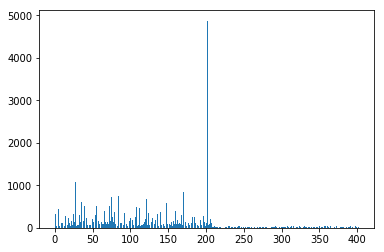

In [34]:
plt.bar(left=range(403), height=class_counts)

In [12]:
from problem import workflow
workflow.n_jobs = 10
workflow.chunk_size = 256
workflow.test_batch_size = 128

In [13]:
workflow.test_submission(trained_model, folder_X_array)

KeyboardInterrupt: 